<a href="https://colab.research.google.com/github/dmunozbe/TFM_DataScience/blob/main/NB_Paro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Carga del conjunto de datos


Cargamos en un dataframe el dataset del paro en la ciudad de Barcelona

In [14]:
# Importamos las librerias necesarias
#import requests
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [15]:
def cargar_csv(ruta):
    try:
        # Cargar el archivo CSV en un DataFrame de pandas
        dataframe = pd.read_csv(ruta)
        return dataframe
    except Exception as e:
        print("Error al cargar el archivo CSV:", e)
        return None

In [16]:
# Directorio del indicador 1
directorio ='/content/drive/MyDrive/UOC/TFM/Datasets Indicadores/Básico/Economía/Indicador_1_Paro'

# Lista de archivos CSV en el directorio
archivos_csv = [archivo for archivo in os.listdir(directorio) if archivo.endswith('.csv')]

# Lista para almacenar los DataFrames de cada archivo CSV
dfs = []

# Iterar sobre cada archivo CSV y cargarlo en un DataFrame
for archivo in archivos_csv:
    ruta_archivo = os.path.join(directorio, archivo)
    df = cargar_csv(ruta_archivo)
    dfs.append(df)

# Concatenar todos los DataFrames en un solo DataFrame
df_final = pd.concat(dfs, ignore_index=True)

In [17]:
# Mostramos las primeras filas del dataframe
print(df_final.head())

    Any  Mes  Codi_Districte Nom_Districte  Codi_Barri  \
0  2023    1               1  Ciutat Vella           1   
1  2023    1               1  Ciutat Vella           2   
2  2023    1               1  Ciutat Vella           3   
3  2023    1               1  Ciutat Vella           4   
4  2023    1               2      Eixample           5   

                               Nom_Barri   Sexe Demanda_ocupacio  Nombre  
0                               el Raval  Dones   Atur Registrat    1379  
1                         el Barri Gòtic  Dones   Atur Registrat     389  
2                         la Barceloneta  Dones   Atur Registrat     427  
3  Sant Pere, Santa Caterina i la Ribera  Dones   Atur Registrat     591  
4                          el Fort Pienc  Dones   Atur Registrat     538  


In [18]:
print('Cantidad de Filas y columnas:',df_final.shape)
print('Nombre columnas:',df_final.columns)

Cantidad de Filas y columnas: (39072, 9)
Nombre columnas: Index(['Any', 'Mes', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri',
       'Nom_Barri', 'Sexe', 'Demanda_ocupacio', 'Nombre'],
      dtype='object')


In [19]:
# Observamos el numero y los nombres de los atributos, el numero de filas y si hay missing-values o no
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39072 entries, 0 to 39071
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Any               39072 non-null  int64 
 1   Mes               39072 non-null  int64 
 2   Codi_Districte    39072 non-null  int64 
 3   Nom_Districte     39072 non-null  object
 4   Codi_Barri        39072 non-null  int64 
 5   Nom_Barri         39072 non-null  object
 6   Sexe              39072 non-null  object
 7   Demanda_ocupacio  39072 non-null  object
 8   Nombre            39072 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 2.7+ MB


El dataset se compone de un total de 9 columnas:
*   **Any:** Año en el que se recogieron los datos
*   **Mes:** Mes en el que se recogieron los datos
*   **Codi_Districte:** Codigo del distrito de Barcelona
*   **Nom_Districte:** Nombre del distrito de Barcelona
*   **Codi_Barri:** Codigo del barrio de Barcelona
*   **Nom_Barri:** Nombre del barrio de Barcelona
*   **Sexe:** Sexo de las personas
*   **Demanda_ocupacio:** Demanda de la ocupacion de trabajadores
*   **Numbre:** Cantidad de personas

El dataset tiene un total de 3552 filas y missing-values


In [20]:
# Analizamos las variables numericas
df_final.describe()

,Any,Mes,Codi_Districte,Codi_Barri,Nombre
count,39072.000000,39072.000000,39072.000000,39072.000000,39072.000000
mean,2017.818182,6.500000,7.500000,37.837838,449.660831
std,3.459371,3.452097,11.061701,22.119143,443.470444
min,2011.000000,1.000000,1.000000,1.000000,0.000000
25%,2015.000000,3.750000,4.000000,19.000000,125.000000
50%,2018.000000,6.500000,7.000000,37.500000,300.000000
75%,2021.000000,9.250000,8.000000,56.000000,660.000000
max,2023.000000,12.000000,99.000000,99.000000,5295.000000


Analizando cada una de las variables numericas vemos que la variable:
*   **Any:** es integra y contiene la información correcta.
*   **Mes:** es integra y contiene la información correcta.
*   **Codi_Districte:** aunque es una variable numerica corresponde con valores categoricos. Por otro lado vemos que puede haber algun valor que no es correcto. Barcelona se compone de 10 distritos, y en cambio como valor maximo nos aparece 99.
*   **Codi_Barri:** aunque es una variable numerica corresponde con valores categoricos. Por otro lado vemos que puede haber algun valor que no es correcto. Barcelona se compone de 73 barrios, y en cambio como valor maximo nos aparece 99
*   **Nombre:** es integra y contiene la información correcta.


In [21]:
# Ahondamos en los distritos mirando el codigo y el nombre del distrito, obteniendo un dataset unicamente con estas dos columnas
distritos = df_final[['Codi_Districte','Nom_Districte']]

# Agrupamos por codigo y nombre de distrito
distritosAgrup=distritos.groupby(['Codi_Districte','Nom_Districte'])

# Realizamos un conteo de cada codigo de distrito
distritosAgrup=distritosAgrup['Codi_Districte'].count()

print(distritosAgrup)

Codi_Districte  Nom_Districte      
1               Ciutat Vella           2112
2               Eixample               3168
3               Sants-Montjuïc         4224
4               Les Corts              1584
5               Sarrià-Sant Gervasi    3168
6               Gràcia                 2640
7               Horta-Guinardó         5808
8               Nou Barris             6864
9               Sant Andreu            3696
10              Sant Martí             5280
99              No consta               528
Name: Codi_Districte, dtype: int64


Se observa que el Codi_Districte = 99 es un missing value, por lo que se descartaran estos valores del conjunto de datos, eliminando 528 filas

In [22]:
# Filtramos el dataset datos, para quedarnos con todas aquellas filas que tienen un Codi_Districte diferente a 99
datosFiltrados = df_final[df_final['Codi_Districte']!=99]

print('Cantidad de Filas y columnas:',datosFiltrados.shape)
print('Nombre columnas:',datosFiltrados.columns)

Cantidad de Filas y columnas: (38544, 9)
Nombre columnas: Index(['Any', 'Mes', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri',
       'Nom_Barri', 'Sexe', 'Demanda_ocupacio', 'Nombre'],
      dtype='object')


Despues de estos primeros pasos, hemos pasado de un dataframe de 39072 filas a 38544

In [23]:
valores_unicos = datosFiltrados['Demanda_ocupacio'].unique()

# Ahora puedes imprimir los diferentes valores únicos
print("Diferentes valores de la variable:")
print(valores_unicos)

Diferentes valores de la variable:
['Atur Registrat' 'Demanda No Aturats' 'Atur registrat'
 'Demanda no aturats']


In [33]:
# Filtrar el dataFrame por Total. Milers d'euros
df_parados = datosFiltrados[(datosFiltrados['Demanda_ocupacio'] == "Atur Registrat") | (datosFiltrados['Demanda_ocupacio'] == "Atur registrat")]

# Modificamos nombre de la variable valor
df_parados = df_parados.rename(columns={'Nombre': 'Parados'})

# Modificamos nombre de la variable valor
df_parados = df_parados.drop(columns=['Demanda_ocupacio'])

df_parados.head()

,Any,Mes,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Sexe,Parados
0,2023,1,1,Ciutat Vella,1,el Raval,Dones,1379
1,2023,1,1,Ciutat Vella,2,el Barri Gòtic,Dones,389
2,2023,1,1,Ciutat Vella,3,la Barceloneta,Dones,427
3,2023,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Dones,591
4,2023,1,2,Eixample,5,el Fort Pienc,Dones,538


In [34]:
print('Cantidad de Filas y columnas:',df_parados.shape)
print('Nombre columnas:',df_parados.columns)

Cantidad de Filas y columnas: (22776, 8)
Nombre columnas: Index(['Any', 'Mes', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri',
       'Nom_Barri', 'Sexe', 'Parados'],
      dtype='object')


In [25]:
# Filtrar el dataFrame por Total. Milers d'euros
df_no_parados = datosFiltrados[(datosFiltrados['Demanda_ocupacio'] == "Demanda No Aturats") | (datosFiltrados['Demanda_ocupacio'] == "Demanda no aturats")]

# Modificamos nombre de la variable valor
df_no_parados = df_no_parados.rename(columns={'Nombre': 'NoParados'})

# Modificamos nombre de la variable valor
df_no_parados = df_no_parados.drop(columns=['Demanda_ocupacio'])

df_no_parados.head()

,Any,Mes,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Sexe,NoParados
74,2023,1,1,Ciutat Vella,1,el Raval,Dones,446
75,2023,1,1,Ciutat Vella,2,el Barri Gòtic,Dones,128
76,2023,1,1,Ciutat Vella,3,la Barceloneta,Dones,137
77,2023,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Dones,193
78,2023,1,2,Eixample,5,el Fort Pienc,Dones,184


In [35]:
print('Cantidad de Filas y columnas:',df_no_parados.shape)
print('Nombre columnas:',df_no_parados.columns)

Cantidad de Filas y columnas: (15768, 8)
Nombre columnas: Index(['Any', 'Mes', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri',
       'Nom_Barri', 'Sexe', 'NoParados'],
      dtype='object')


In [38]:
# Realizar la unión de los DataFrames por múltiples claves
df_filtrado = pd.merge(df_parados, df_no_parados, how='left')

# Mostrar el resultado del filtrado
df_filtrado.head()

,Any,Mes,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Sexe,Parados,NoParados
0,2023,1,1,Ciutat Vella,1,el Raval,Dones,1379,446.0
1,2023,1,1,Ciutat Vella,2,el Barri Gòtic,Dones,389,128.0
2,2023,1,1,Ciutat Vella,3,la Barceloneta,Dones,427,137.0
3,2023,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Dones,591,193.0
4,2023,1,2,Eixample,5,el Fort Pienc,Dones,538,184.0


In [39]:
print('Cantidad de Filas y columnas:',df_filtrado.shape)
print('Nombre columnas:',df_filtrado.columns)

Cantidad de Filas y columnas: (22776, 9)
Nombre columnas: Index(['Any', 'Mes', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri',
       'Nom_Barri', 'Sexe', 'Parados', 'NoParados'],
      dtype='object')


# 2. Análisis de los datos

Requisitos a tener en cuenta antes de realizar el analisis de datos:
1.   La informacion de personas en paro por Barrio, no es relevante para este TFM, por lo que se debera agrupar la información por distrito
2.   El indicador 1 de la ISO-37120, "tasa de desempleo" no distingue entre sexos, por lo que se debera agrupar la información omitiendo la variable sexe


In [40]:
# De acuerdo con los puntos 1, 2 obtenemos un dataframe sin las varriables de Codi_Barri y Nom_Barri, Sexe
datosAtur=df_filtrado[['Any','Mes','Codi_Districte','Nom_Districte','Parados','NoParados']]
datosAtur.head()

,Any,Mes,Codi_Districte,Nom_Districte,Parados,NoParados
0,2023,1,1,Ciutat Vella,1379,446.0
1,2023,1,1,Ciutat Vella,389,128.0
2,2023,1,1,Ciutat Vella,427,137.0
3,2023,1,1,Ciutat Vella,591,193.0
4,2023,1,2,Eixample,538,184.0


In [41]:
# Agrupamos por Any, Mes, Codi_Districte y Nom_Districte
datosAturAgrup = datosAtur.groupby(['Codi_Districte','Nom_Districte','Any','Mes'])

# Sumamos las personas de la variable Nombre
datosAturAgrup=datosAturAgrup[['Parados','NoParados']].mean()

print("Primeras filas del DataFrame:")
datosAturAgrup.head(12)

Primeras filas del DataFrame:


Parados  NoParados
Codi_Districte Nom_Districte Any  Mes                     
1              Ciutat Vella  2011 1    1248.500        NaN
                                  2    1267.375        NaN
                                  3    1267.000        NaN
                                  4    1235.875        NaN
                                  5    1211.750        NaN
                                  6    1198.875        NaN
                                  7    1193.750        NaN
                                  8    1204.000        NaN
                                  9    1201.375        NaN
                                  10   1241.875        NaN
                                  11   1249.125        NaN
                                  12   1249.125        NaN

In [42]:
# Reseteamos indices sobre el dataframe agrupado
datosAturAgrup = datosAturAgrup.reset_index()

In [43]:
datosAturAgrup.head()

,Codi_Districte,Nom_Districte,Any,Mes,Parados,NoParados
0,1,Ciutat Vella,2011,1,1248.500,NaN
1,1,Ciutat Vella,2011,2,1267.375,NaN
2,1,Ciutat Vella,2011,3,1267.000,NaN
3,1,Ciutat Vella,2011,4,1235.875,NaN
4,1,Ciutat Vella,2011,5,1211.750,NaN


## 2.1 Análisis estadistíco básico

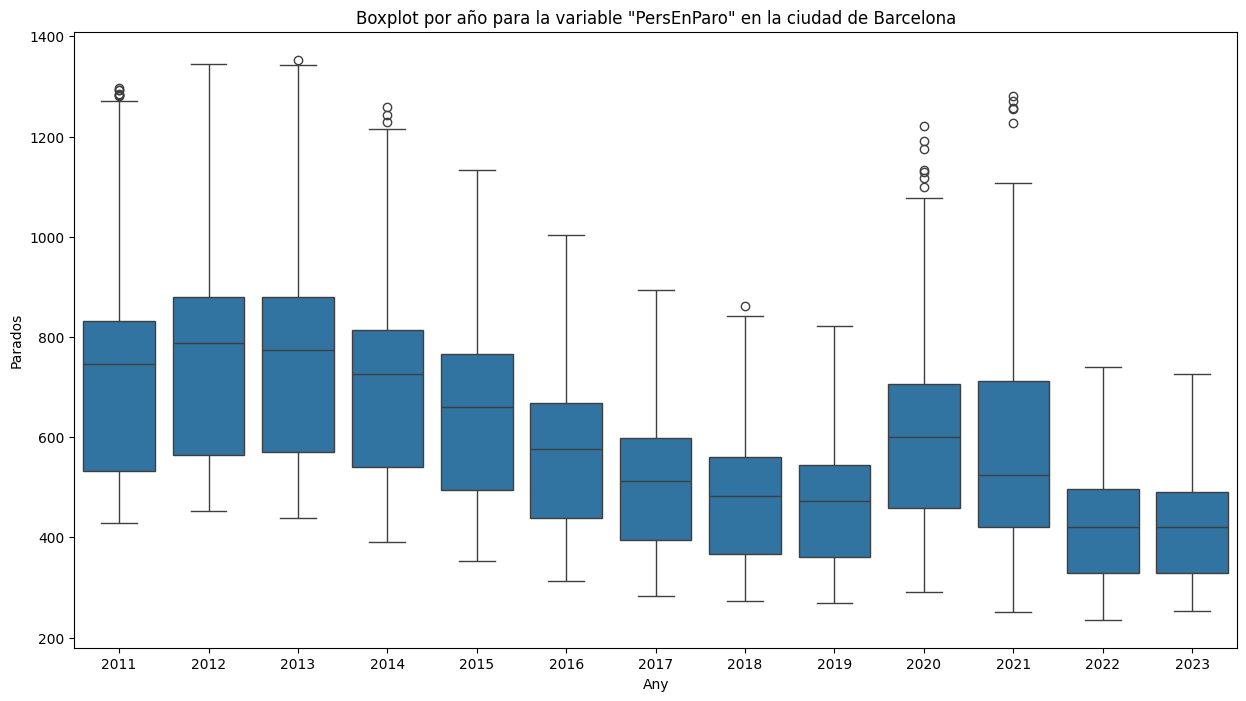

In [44]:
# Crear diagrama de caja para la variable continua Nombre
plt.figure(figsize=(15, 8))
sns.boxplot(x='Any', y='Parados', data=datosAturAgrup)
plt.title('Boxplot por año para la variable "Parados" en la ciudad de Barcelona')

# Mostrar el diagrama de caja
plt.show()

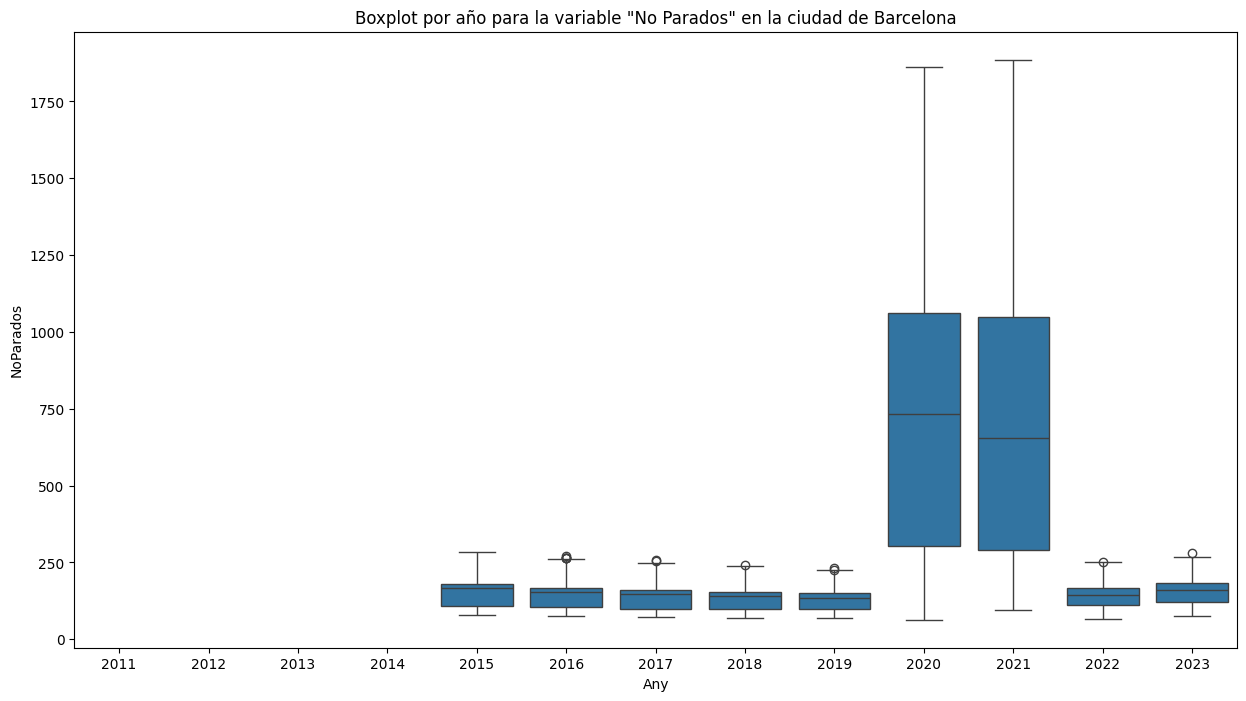

In [46]:
# Crear diagrama de caja para la variable continua Nombre
plt.figure(figsize=(15, 8))
sns.boxplot(x='Any', y='NoParados', data=datosAturAgrup)
plt.title('Boxplot por año para la variable "No Parados" en la ciudad de Barcelona')

# Mostrar el diagrama de caja
plt.show()

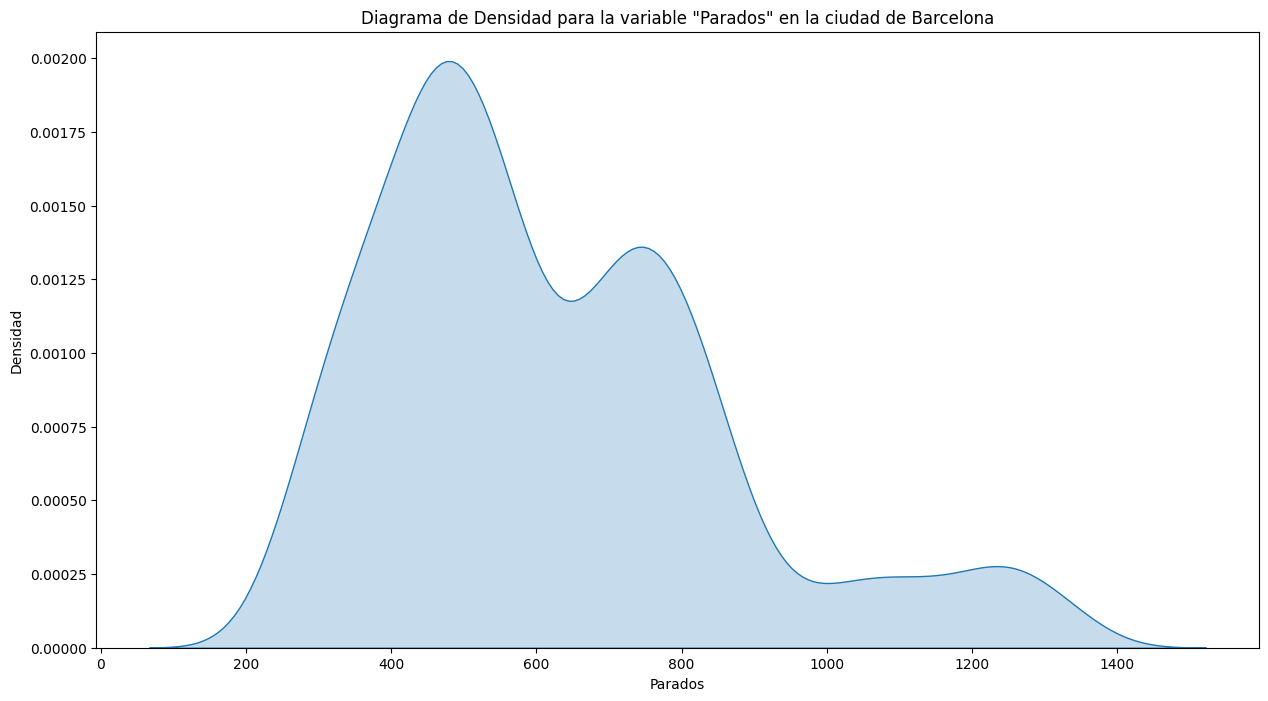

In [48]:
# Crear diagrama de densidad
plt.figure(figsize=(15, 8))
sns.kdeplot(datosAturAgrup['Parados'], fill=True)
plt.title('Diagrama de Densidad para la variable "Parados" en la ciudad de Barcelona')
plt.xlabel('Parados')
plt.ylabel('Densidad')

# Mostrar el diagrama de densidad
plt.show()

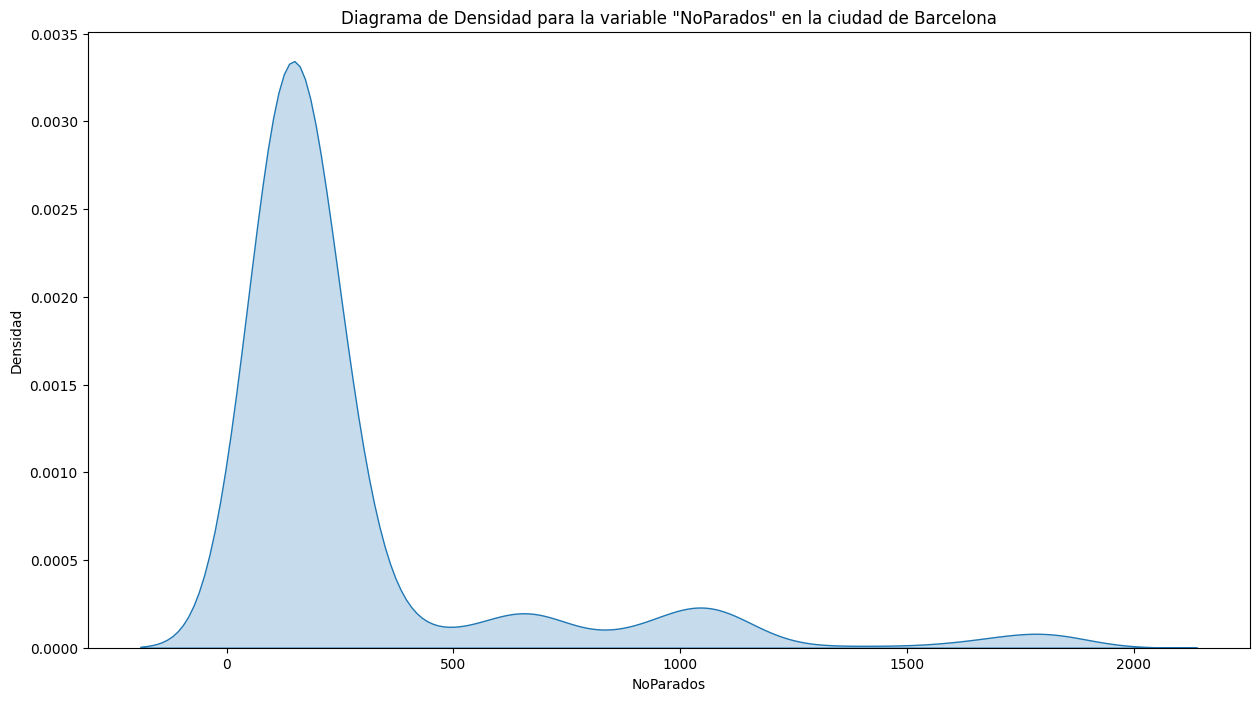

In [52]:
# Crear diagrama de densidad
plt.figure(figsize=(15, 8))
sns.kdeplot(datosAturAgrup['NoParados'], fill=True)
plt.title('Diagrama de Densidad para la variable "NoParados" en la ciudad de Barcelona')
plt.xlabel('NoParados')
plt.ylabel('Densidad')

# Mostrar el diagrama de densidad
plt.show()

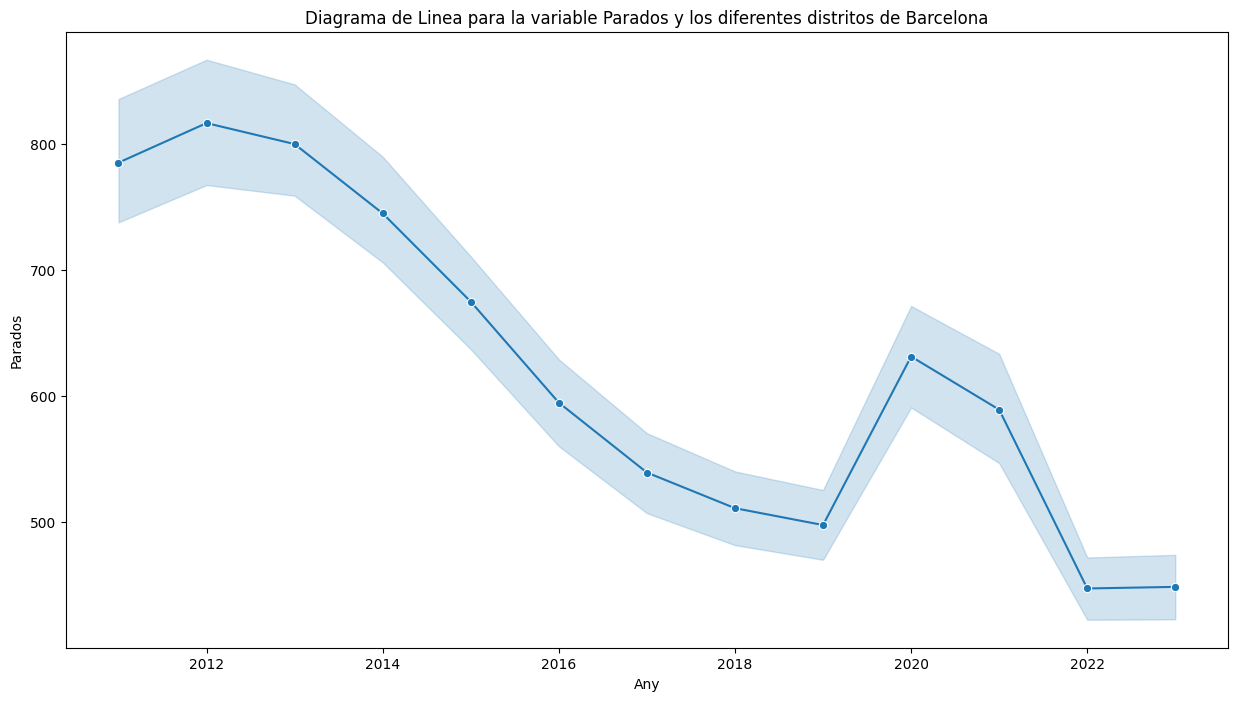

In [54]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))
sns.lineplot(data=datosAturAgrup, x='Any', y='Parados', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable Parados y los diferentes distritos de Barcelona')
plt.xlabel('Any')
plt.ylabel('Parados')

plt.show()

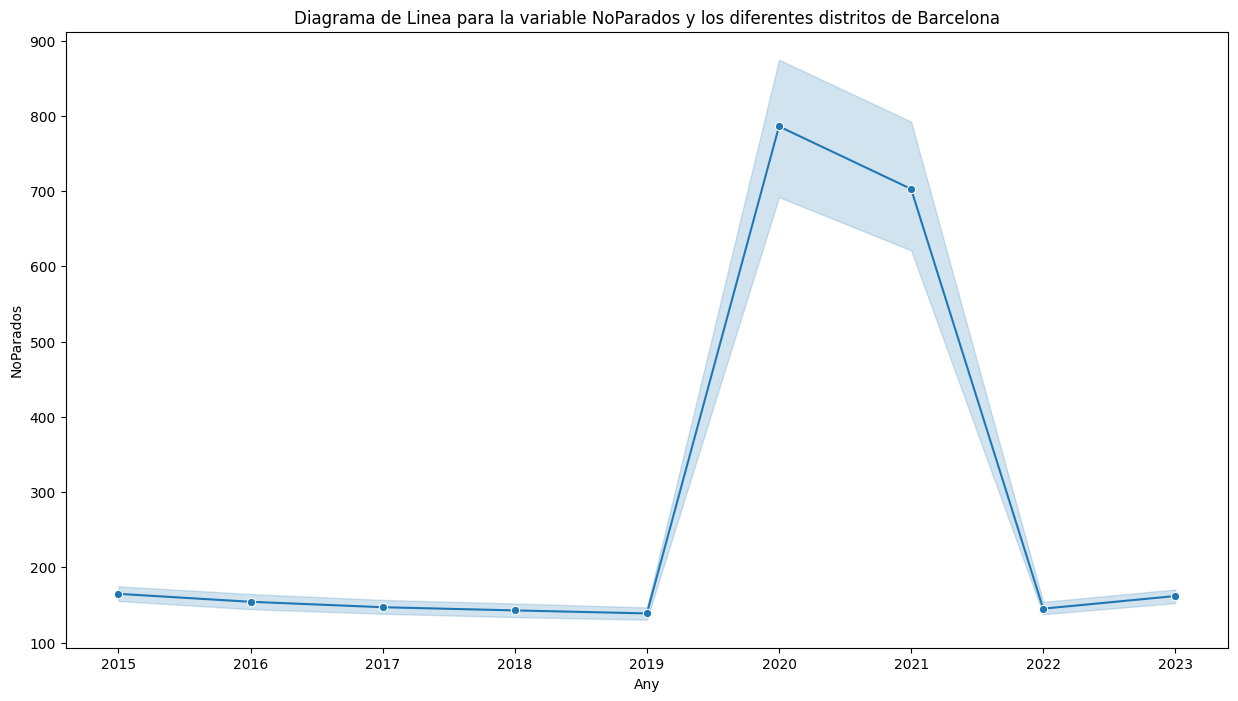

In [55]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))
sns.lineplot(data=datosAturAgrup, x='Any', y='NoParados', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable NoParados y los diferentes distritos de Barcelona')
plt.xlabel('Any')
plt.ylabel('NoParados')

plt.show()

In [56]:
# Obtener valores únicos de la variable categórica Nom Districte
distritos_ar = datosAturAgrup['Nom_Districte'].unique()
distritos_ar

array(['Ciutat Vella', 'Eixample', 'Sants-Montjuïc', 'Les Corts',
       'Sarrià-Sant Gervasi', 'Gràcia', 'Horta-Guinardó', 'Nou Barris',
       'Sant Andreu', 'Sant Martí'], dtype=object)

In [57]:
# Obtener valores únicos de la variable categórica Mes
any_ar = datosAturAgrup['Any'].unique()
any_ar

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023])

In [58]:
# Obtener valores únicos de la variable categórica Mes
meses_ar = datosAturAgrup['Mes'].unique()
meses_ar

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

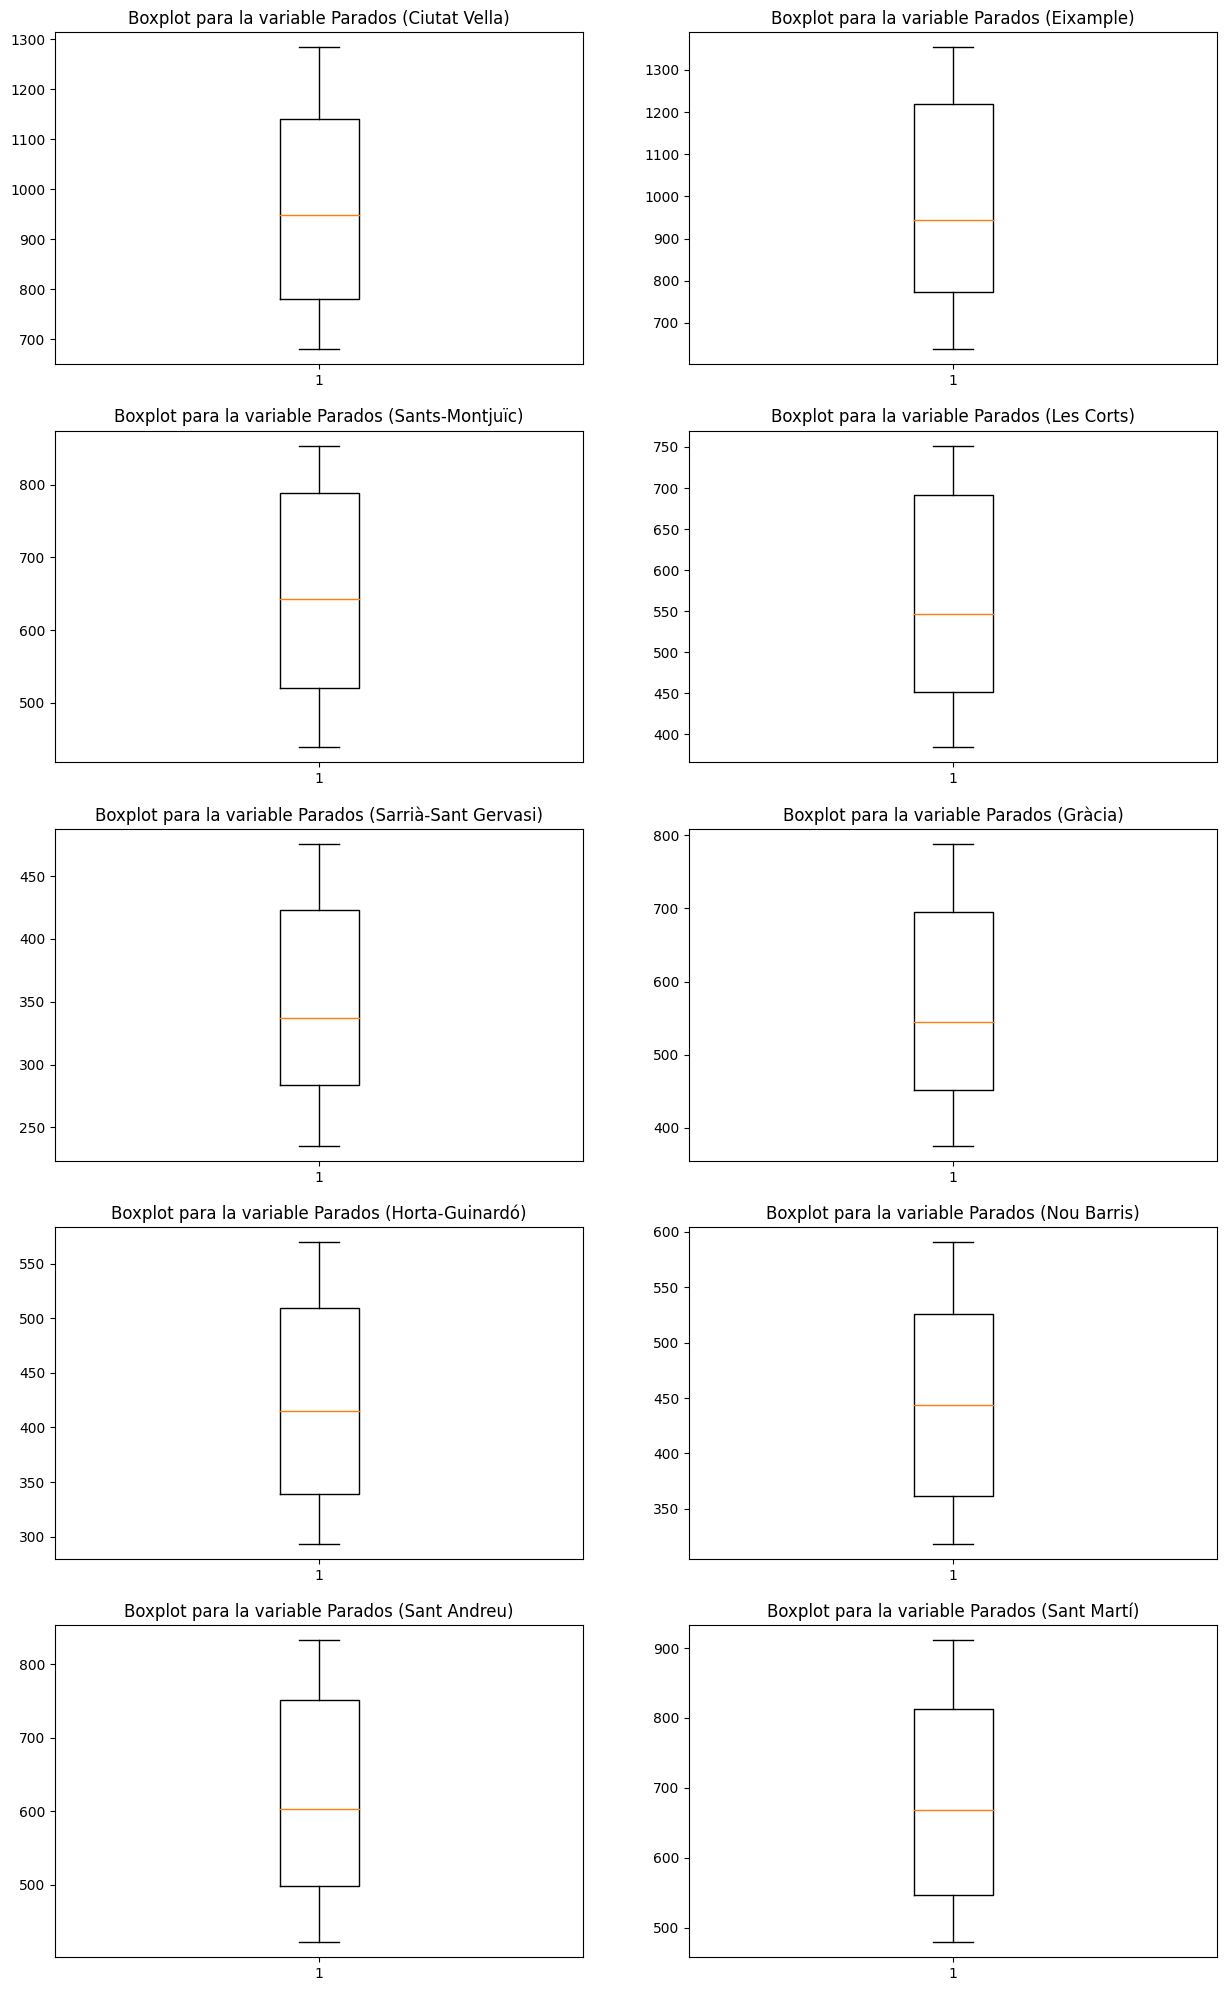

In [60]:
# Crear una figura y ejes
fig, axs = plt.subplots(5, 2, figsize=(15, 25))
x=0 ;y=0

# Crear un gráfico para cada distrito
for district in distritos_ar:
    subset = datosAturAgrup[datosAturAgrup['Nom_Districte'] == district]  # Filtrar datos para la categoría actual
    axs[x, y].boxplot(data=subset, x='Parados')# Graficar los valores de la variable continua
    # Configuraciones adicionales
    axs[x, y].set_title('Boxplot para la variable Parados (' + district +')' )
    if y==0:
      y=1
    else:
      y=0
      x=x+1

plt.show()

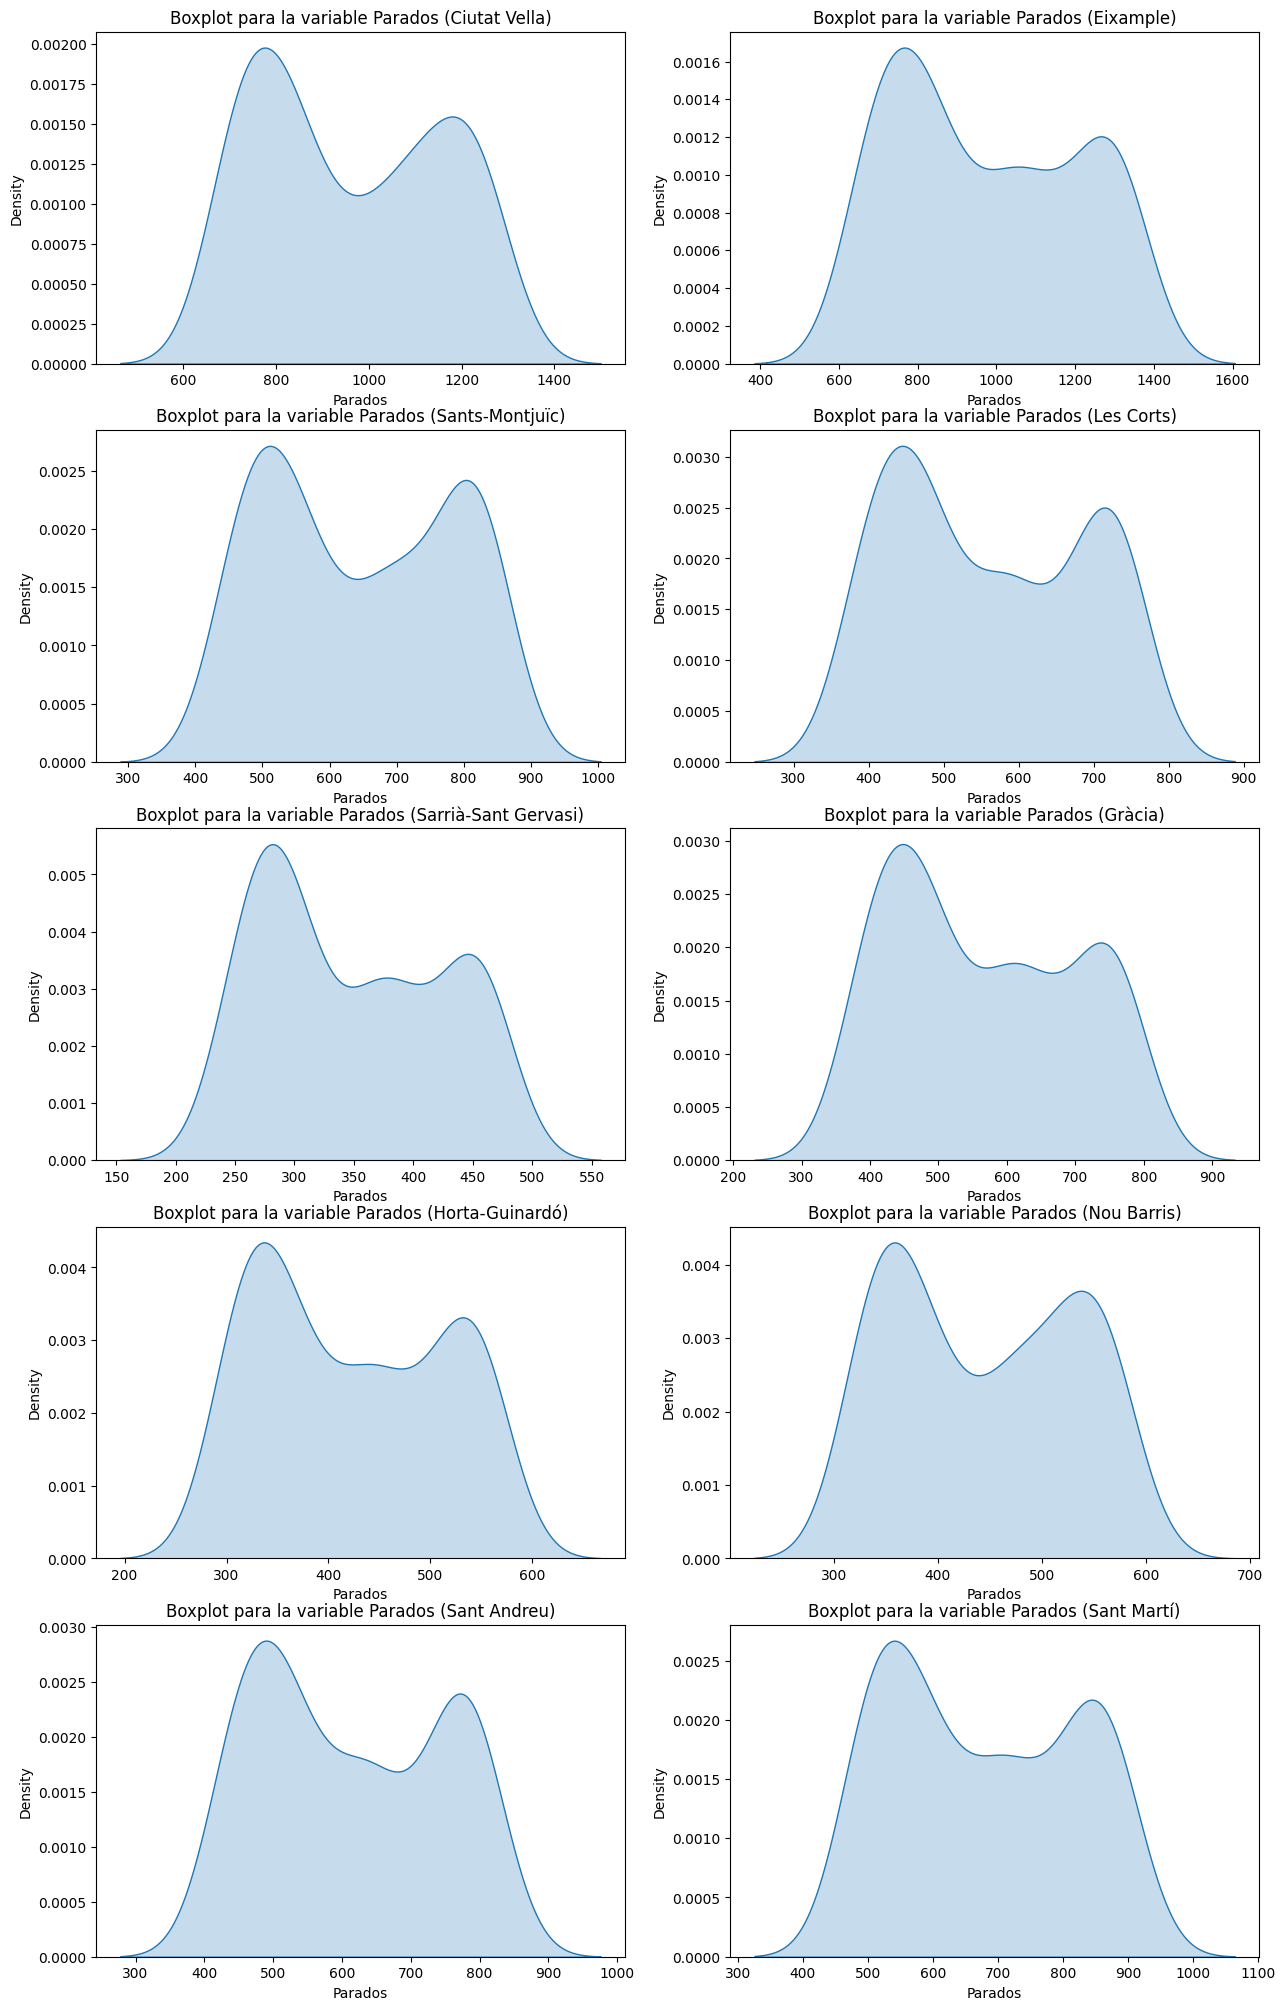

In [62]:
# Crear una figura y ejes
fig, axs = plt.subplots(5, 2, figsize=(15, 25))
x=0 ;y=0

# Crear un gráfico para cada distrito
for district in distritos_ar:
    subset = datosAturAgrup[datosAturAgrup['Nom_Districte'] == district]  # Filtrar datos para la categoría actual
    sns.kdeplot(subset['Parados'],ax=axs[x, y], fill=True)
    #axs[x, y].boxplot(data=subset, x='Nombre')# Graficar los valores de la variable continua
    # Configuraciones adicionales
    axs[x, y].set_title('Boxplot para la variable Parados (' + district +')' )
    if y==0:
      y=1
    else:
      y=0
      x=x+1

plt.show()

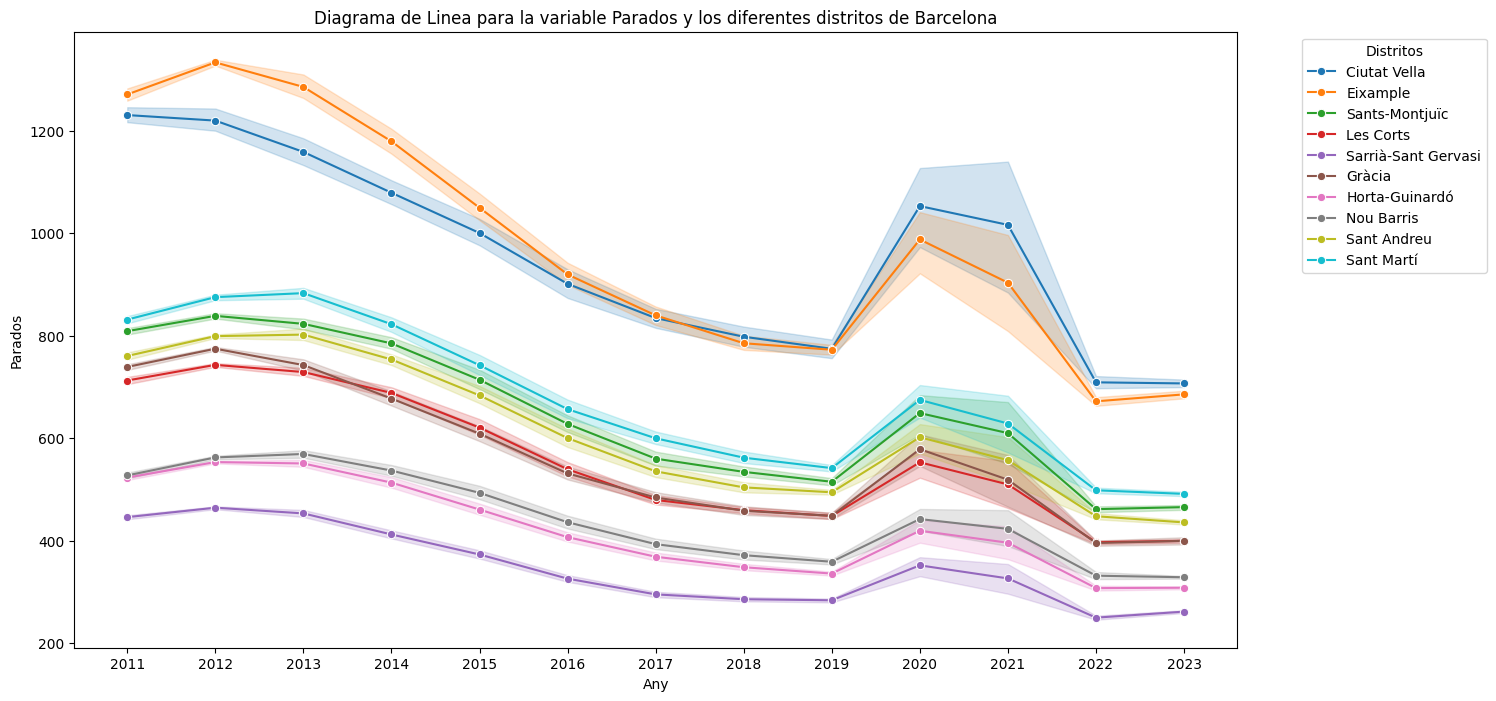

In [63]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))
sns.lineplot(data=datosAturAgrup, x='Any', y='Parados', hue='Nom_Districte', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable Parados y los diferentes distritos de Barcelona')
plt.xlabel('Any')
plt.ylabel('Parados')
plt.legend(title='Distritos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(any_ar)

# Sacamos la leyenda fuera del grafico

plt.show()

In [64]:
# Cargar el archivo shapefile de los distritos de Barcelona
barcelona_distritos = gpd.read_file("/content/drive/MyDrive/UOC/TFM/Datasets Indicadores/Grafo viario de las calles de la ciudad de Barcelona/BCN_UNITATS_ADM/0301040100_Districtes_UNITATS_ADM.shp")

# Mostrar información básica sobre el shapefile
print("Información del shapefile:")
barcelona_distritos.head()


Información del shapefile:


,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID_V,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((431733.736 4582441.816, 431827.673 4..."
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((432033.184 4583665.032, 432032.069 4..."
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((428773.911 4580873.742, 428833..."
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((425054.670 4583672.560, 425062.830 4..."
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((422563.071 4587486.743, 422568..."


In [65]:
# Convertimos el tipo de valor de la variable distrito a entero
barcelona_distritos['DISTRICTE'] = barcelona_distritos['DISTRICTE'].astype(int)

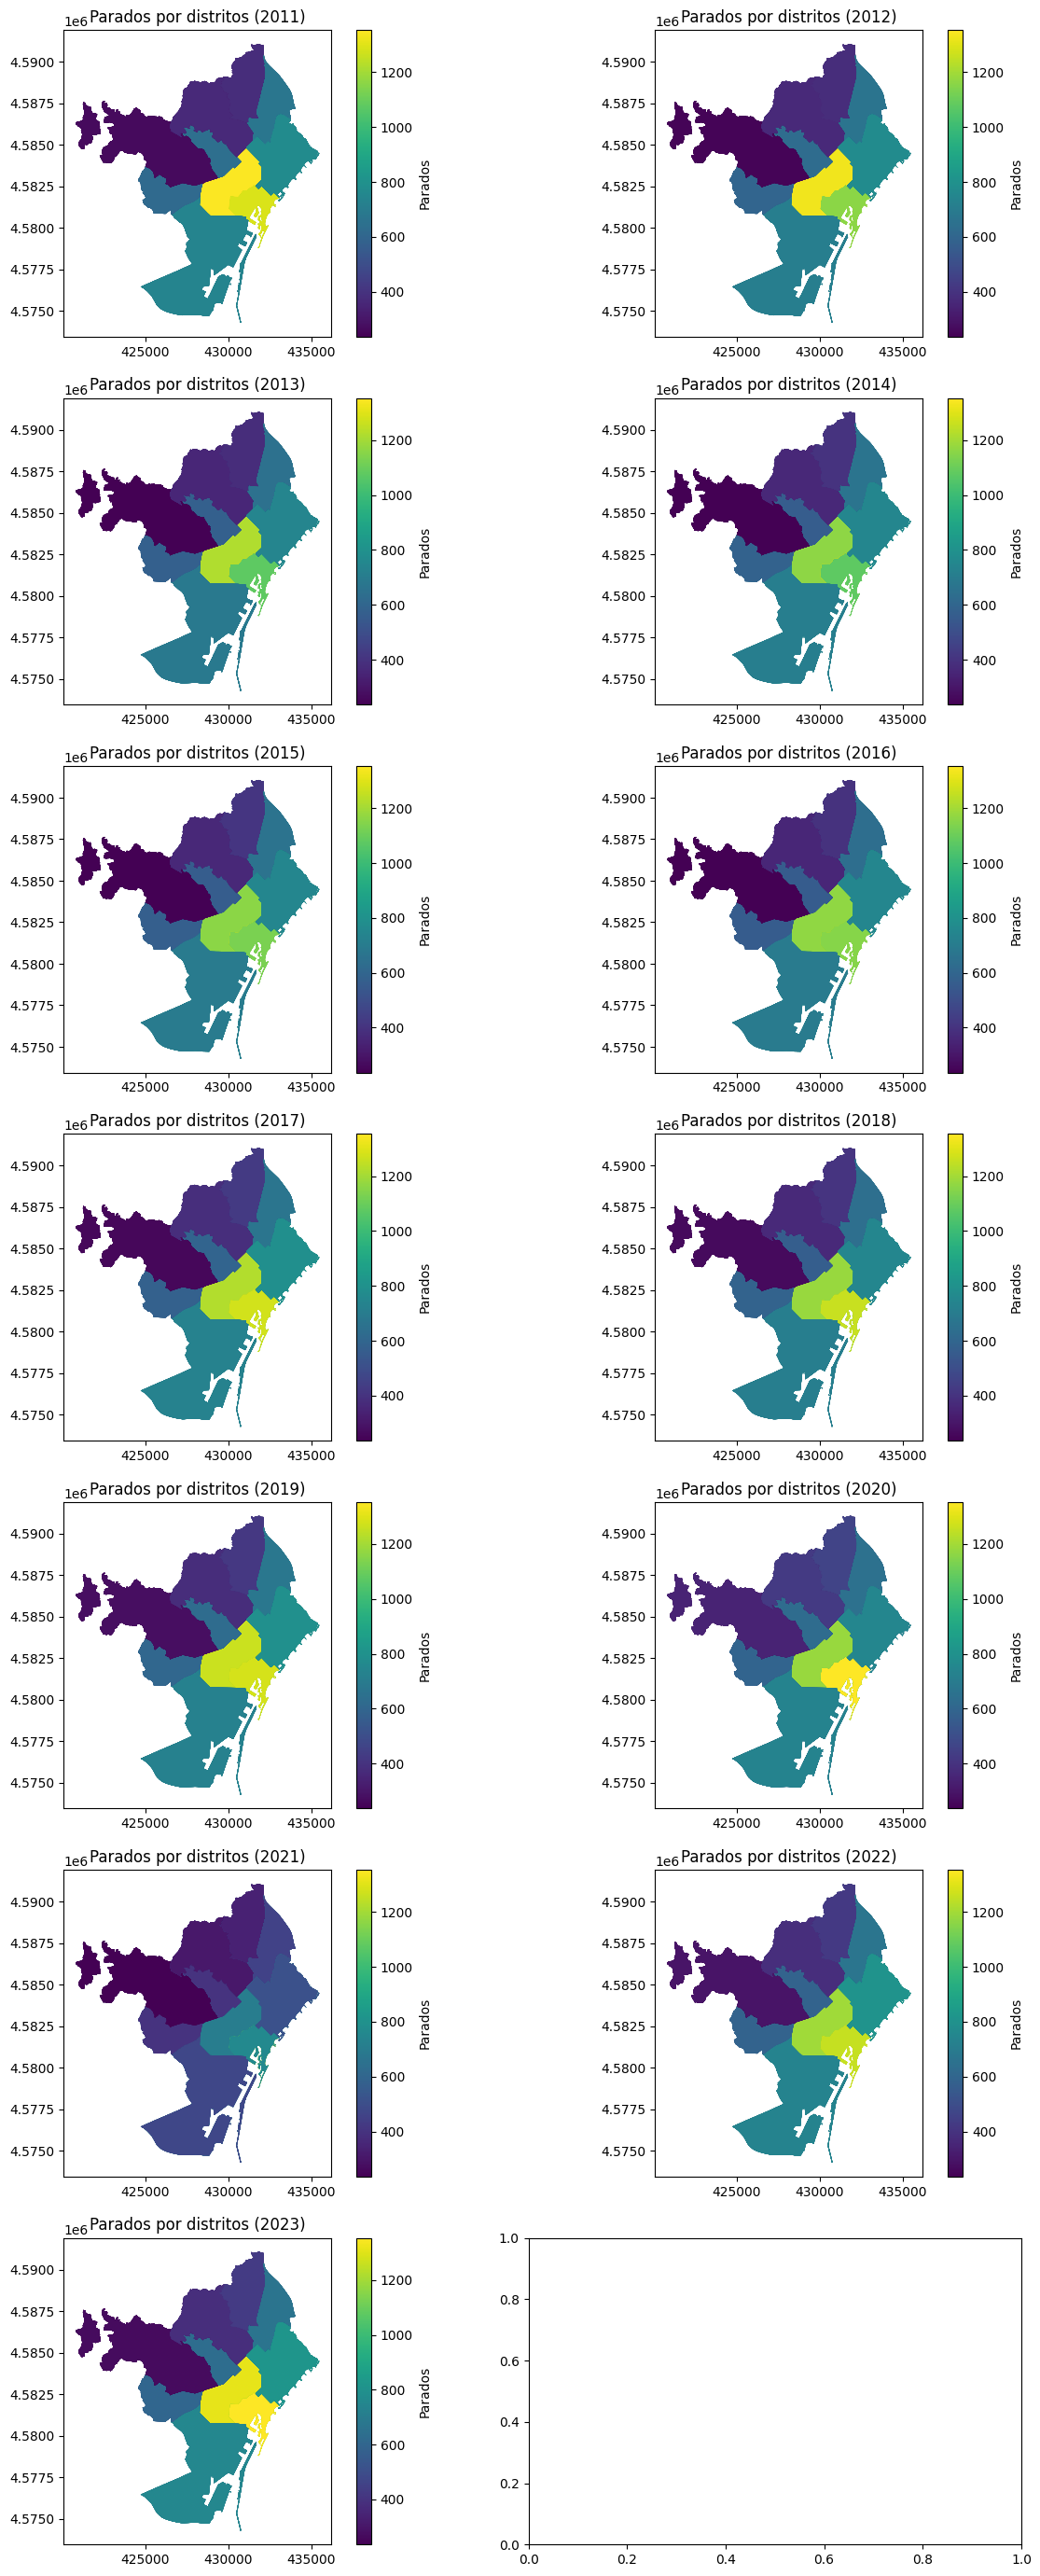

In [71]:
xmin = min(datosAturAgrup['Parados'])
xmax = max(datosAturAgrup['Parados'])

# Crear una figura y ejes
fig, axs = plt.subplots(7, 2, figsize=(15, 35))
x=0 ;y=0

# Crear un gráfico para cada distrito
for any in any_ar:
  subset = datosAturAgrup[datosAturAgrup['Any'] == any]  # Filtrar datos para la categoría actual
  barcelona_distritos.plot(ax=axs[x, y], color='lightgrey')  # Graficar el Shapefile
  merged_data = barcelona_distritos.merge(subset, how='left', left_on='DISTRICTE', right_on='Codi_Districte') # Combinar datos CSV y Shapefile

  # Trazar el GeoDataFrame con un gradiente de color
  cmap = 'viridis'  # Selecciona el mapa de color
  norm = Normalize(vmin=xmin, vmax=xmax)
  sm = ScalarMappable(cmap=cmap, norm=norm)

  merged_data.plot(ax=axs[x, y], column='Parados', cmap='viridis', legend=False)  # Graficar los datos combinados

  # Configuraciones adicionales
  axs[x, y].set_title('Parados por distritos (' + str(any) +')' )



  # Establecer los límites de la leyenda
  sm.set_clim(xmin, xmax)

  # Crear la leyenda con un gradiente de color
  cbar = plt.colorbar(sm, ax=axs[x, y])
  cbar.set_label('Parados')  # Establece el nombre de la variable

  if y==0:
    y=1
  else:
    y=0
    x=x+1

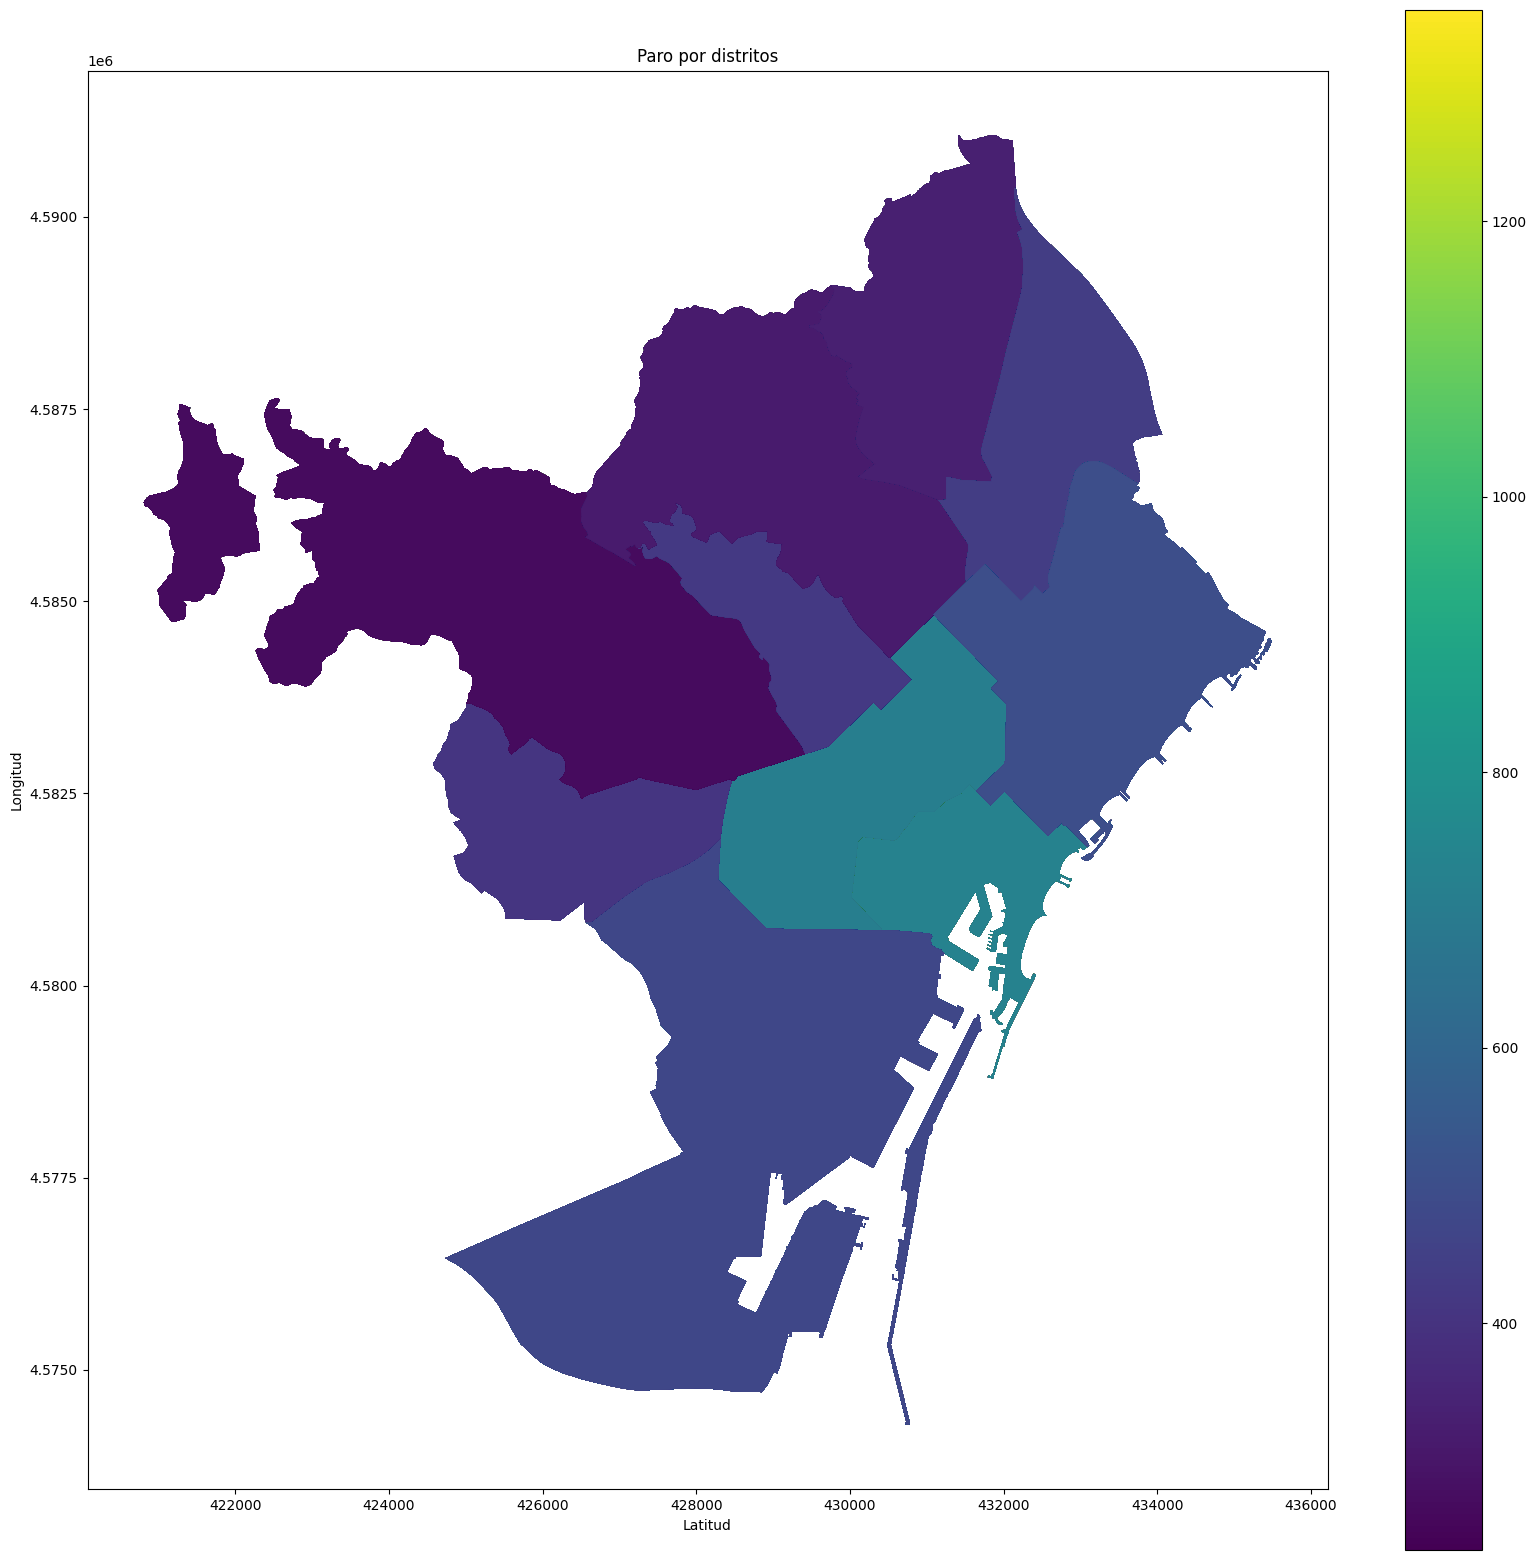

In [72]:
# Combinar datos CSV y Shapefile
merged_data = barcelona_distritos.merge(datosAturAgrup, how='left', left_on='DISTRICTE', right_on='Codi_Districte')

# Graficar
fig, ax = plt.subplots(1, 1,figsize=(20, 20))
barcelona_distritos.plot(ax=ax, color='lightgrey')  # Graficar el Shapefile
merged_data.plot(ax=ax, column='Parados', cmap='viridis', legend=True)  # Graficar los datos combinados

plt.title('Paro por distritos')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.show()

In [ ]:
# Guardar el DataFrame en un archivo CSV
datosAturAgrup.to_csv('datosParo.csv', index=False)